In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy.integrate import odeint
from scipy import linalg as la
from scipy.stats import linregress

# Problem 1

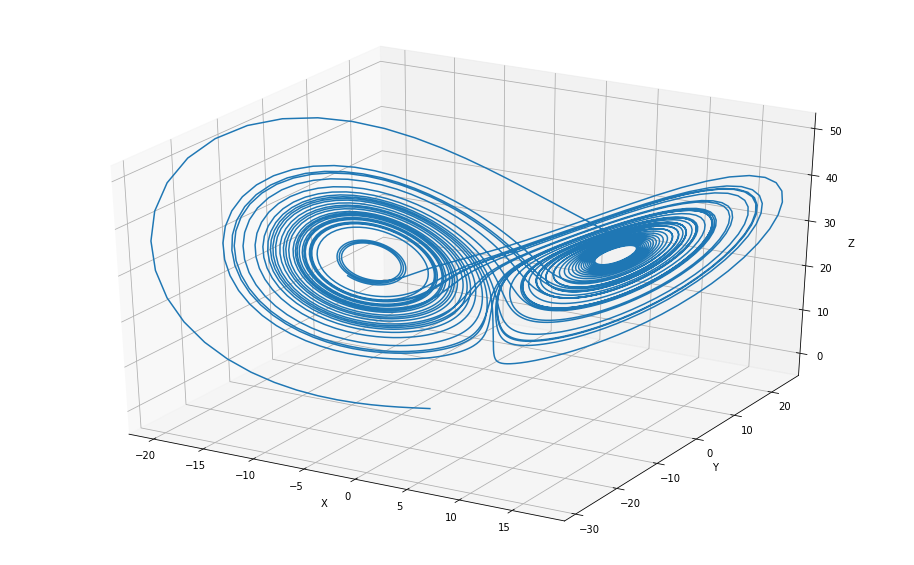

In [3]:
def lorenz_ode(inputs, T):
    x,y,z = inputs
    return np.array([sigma*(y - x), rho*x - y - x*z, x*y - beta*z])

def solve_lorenz(init_cond, time = 10, Atol = None, Rtol = None):
    T = np.linspace(0, time, time*100)
    if Atol is not None and Rtol is not None:
        sol = sol = odeint(lorenz_ode, init_cond, T, atol = Atol, rtol = Rtol)
    else:
        sol = odeint(lorenz_ode, init_cond, T)
    # return X,Y,Z
    return sol[:, 0],sol[:, 1],sol[:, 2]

sigma, rho, beta = 10, 28, 8./3
init_cond = np.random.choice(np.arange(-15, 16), 3)

X,Y,Z = solve_lorenz(init_cond, 50)

rcParams['figure.figsize'] = (16,10)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot(X,Y,Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([min(X), max(X)])
ax.set_ylim3d([min(Y), max(Y)])
ax.set_zlim3d([min(Z), max(Z)])
plt.show()

# Problem 2

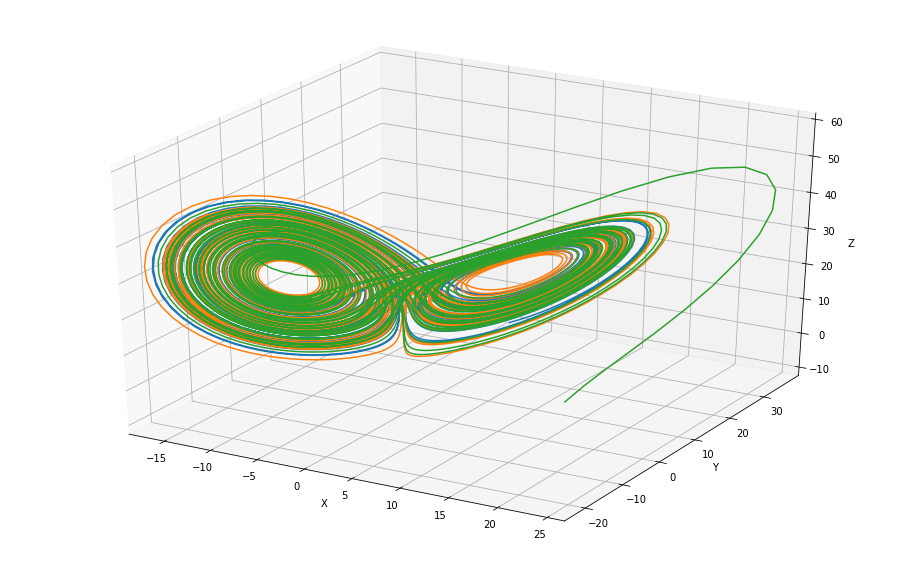

In [4]:
# CHOOSE N
N = 3

sigma, rho, beta = 10, 28, 8./3

rcParams['figure.figsize'] = (16,10)
fig = plt.figure()
ax = fig.gca(projection = '3d')
mins, maxs = [0,0,0], [0,0,0]
for n in range(N):
    init_cond = np.random.choice(np.arange(-15, 16), 3)
    X,Y,Z = solve_lorenz(init_cond, 50)
    variables = [X,Y,Z]
    for i in range(len(variables)):
        mins[i] = min(mins[i], min(variables[i]))
        maxs[i] = max(maxs[i], max(variables[i]))
    ax.plot(X,Y,Z)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([mins[0], maxs[0]])
ax.set_ylim3d([mins[1], maxs[1]])
ax.set_zlim3d([mins[2], maxs[2]])
plt.show()

# Problem 3

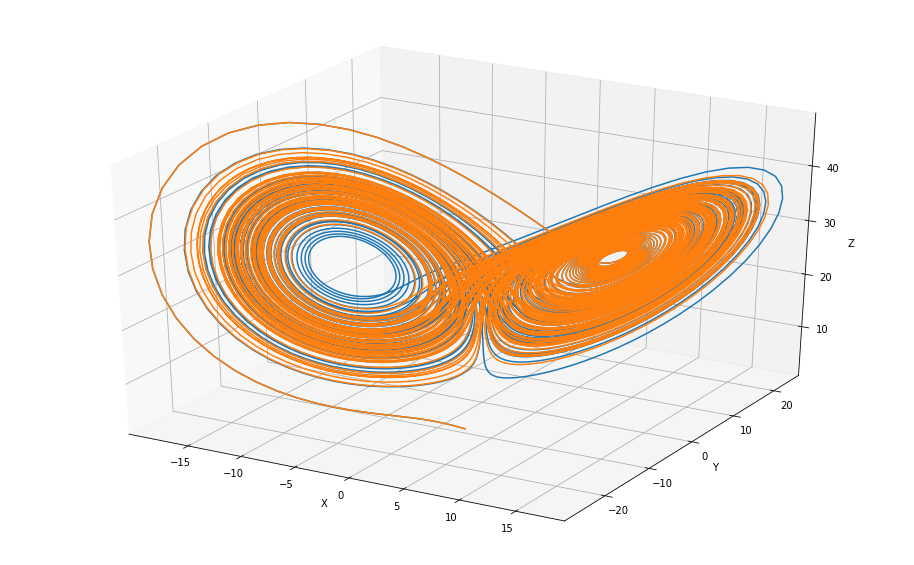

In [5]:
sigma, rho, beta = 10, 28, 8./3
init_cond = np.random.choice(np.arange(-15, 16), 3)
perturbed_ics = init_cond + np.random.randn(3)*(1e-10)

X,Y,Z = solve_lorenz(init_cond, 100)
Xperturbed,Yperturbed,Zperturbed = solve_lorenz(perturbed_ics, 100)

rcParams['figure.figsize'] = (16,10)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot(X,Y,Z)
ax.plot(Xperturbed,Yperturbed,Zperturbed)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
Xs = np.hstack((X,Xperturbed))
Ys = np.hstack((Y,Yperturbed))
Zs = np.hstack((Z,Zperturbed))
ax.set_xlim3d([np.min(Xs), np.max(Xs)])
ax.set_ylim3d([np.min(Ys), np.max(Ys)])
ax.set_zlim3d([np.min(Zs), np.max(Zs)])
plt.show()

# Problem 4

In [6]:
plt.switch_backend('qt5agg')

sigma, rho, beta = 10, 28, 8./3
time = 50
init_cond = np.random.choice(np.arange(-15, 16), 3)
perturbed_ics = init_cond + np.random.randn(3)*(1e-10)
T = np.linspace(0, time, time*100)

X,Y,Z = solve_lorenz(init_cond, time)
Xp,Yp,Zp = solve_lorenz(perturbed_ics, time)

rcParams['figure.figsize'] = (16,10)
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Xs = np.hstack((X,Xp))
Ys = np.hstack((Y,Yp))
Zs = np.hstack((Z,Zp))
ax.set_xlim3d([np.min(Xs), np.max(Xs)])
ax.set_ylim3d([np.min(Ys), np.max(Ys)])
ax.set_zlim3d([np.min(Zs), np.max(Zs)])

ode1_drawing, = plt.plot([],[])
ode2_drawing, = plt.plot([],[])

def update(index):
    ode1_drawing.set_data(X[:index], Y[:index])
    ode1_drawing.set_3d_properties(Z[:index])
    ode2_drawing.set_data(Xp[:index], Yp[:index])
    ode2_drawing.set_3d_properties(Zp[:index])
    return ode1_drawing, ode2_drawing,

a = FuncAnimation(fig, update, frames = len(T), interval = 10)
plt.show()

# Problem 5

In [7]:
plt.switch_backend('qt5agg')

sigma, rho, beta = 10, 28, 8./3
time = 50
init_cond = np.random.choice(np.arange(-15, 16), 3)
T = np.linspace(0, time, time*100)

X0,Y0,Z0 = solve_lorenz(init_cond, time, Atol=1e-14, Rtol=1e-12)
X1,Y1,Z1 = solve_lorenz(init_cond, time, Atol=1e-15, Rtol=1e-13)

rcParams['figure.figsize'] = (16,10)
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Xs = np.hstack((X0,X1))
Ys = np.hstack((Y0,Y1))
Zs = np.hstack((Z0,Z1))
ax.set_xlim3d([np.min(Xs), np.max(Xs)])
ax.set_ylim3d([np.min(Ys), np.max(Ys)])
ax.set_zlim3d([np.min(Zs), np.max(Zs)])

ode1_drawing, = plt.plot([],[])
ode2_drawing, = plt.plot([],[])

def update(index):
    ode1_drawing.set_data(X0[:index], Y0[:index])
    ode1_drawing.set_3d_properties(Z0[:index])
    ode2_drawing.set_data(X1[:index], Y1[:index])
    ode2_drawing.set_3d_properties(Z1[:index])
    return ode1_drawing, ode2_drawing,

a = FuncAnimation(fig, update, frames = len(T), interval = 10)
plt.show()

In [9]:
%matplotlib inline
def lyapunov_exponent(t):
    init_cond = np.random.choice(np.arange(-15, 16), 3)
    X,Y,Z = solve_lorenz(init_cond, t)
    init_cond = np.array([X[-1],Y[-1],Z[-1]])
    perturbed_ics = init_cond + np.random.randn(3)*(1e-10)
    X,Y,Z = solve_lorenz(init_cond, t)
    Xp,Yp,Zp = solve_lorenz(perturbed_ics, t)
    solution = np.vstack((X,Y,Z))
    perturbed_solution = np.vstack((Xp,Yp,Zp))
    norm = []
    for i in range(len(X)):
        norm.append(la.norm(solution[:,i] - perturbed_solution[:,i]))
    norm = np.array(norm)
    log_norm = np.log(norm)
    T = np.linspace(0,t,len(log_norm))
    a,b = linregress(log_norm, T)[:2]
    estimate_log_norm = np.exp(a + b*T)
    plt.semilogy(log_norm, T)
    plt.semilogy(estimate_log_norm, T)
    plt.xlabel('Time')
    plt.ylabel('Separation')
    plt.title("lambda = {}".format(b))
    plt.show()
    
lyapunov_exponent(10)